In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pickle
import json
# import pygmt
%matplotlib inline

In [2]:
folder = "project_chile"
#folder = "ridgecrest"
data_path = lambda x: os.path.join(f"{folder}", x)

station_csv = data_path("stations.csv")
gamma_events = data_path("gamma_events.csv")
relocateds = data_path("relocated2.csv")

gamma_events = pd.read_csv(gamma_events)
#relocated = pd.read_csv(relocated)
stations = pd.read_csv(station_csv)

if os.path.exists(relocateds):
    relocated = pd.read_csv(relocateds)
    #starttime = standard_catalog["time"].min()
    #endtime = standard_catalog["time"].max()
else:
    relocated = None
    #starttime = gamma_events["time"].min()
    #endtime = gamma_events["time"].max()
    
x0 = stations["longitude"].median()
y0 = stations["latitude"].median()
xmin = stations["longitude"].min()
xmax = stations["longitude"].max()
ymin = stations["latitude"].min()
ymax = stations["latitude"].max()
config = {}
config["center"] = (x0, y0)
config["xlim_degree"] = (2 * xmin - x0, 2 * xmax - x0)
config["ylim_degree"] = (2 * ymin - y0, 2 * ymax - y0)
config["z(km)"] = (0, 250)

result_label="GaMMa"
catalog_label="HypoDD"

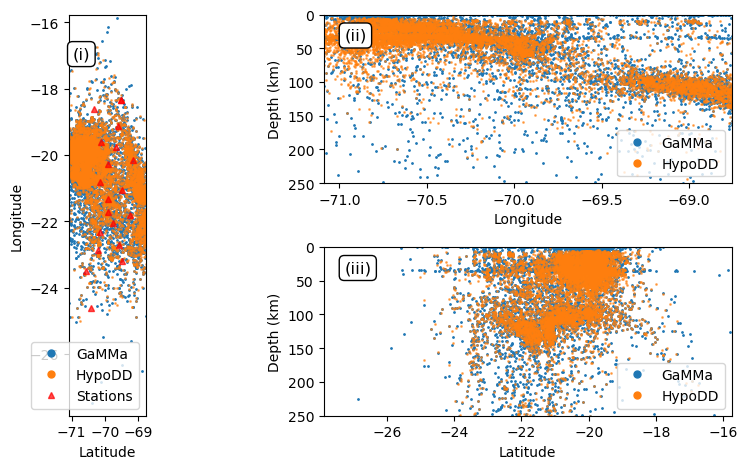

In [3]:
fig = plt.figure(figsize=plt.rcParams["figure.figsize"]*np.array([1.5,1]))
box = dict(boxstyle='round', facecolor='white', alpha=1)
text_loc = [0.05, 0.92]
grd = fig.add_gridspec(ncols=2, nrows=2, width_ratios=[1.5, 1], height_ratios=[1,1])
fig.add_subplot(grd[:, 0])
plt.plot(gamma_events["longitude"], gamma_events["latitude"], '.',markersize=2, alpha=1.0)
plt.plot(relocated["longitude"], relocated["latitude"], '.', markersize=2, alpha=0.6)
plt.axis("scaled")
plt.xlim(np.array(config["xlim_degree"])+np.array([0.2,-0.27]))
plt.ylim(np.array(config["ylim_degree"])+np.array([0.2,-0.27]))
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.gca().set_prop_cycle(None)
plt.plot(config["xlim_degree"][0]-10, config["ylim_degree"][0]-10, '.', markersize=10, label=f"{result_label}", rasterized=True)
plt.plot(config["xlim_degree"][0]-10, config["ylim_degree"][0]-10, '.', markersize=10, label=f"{catalog_label}", rasterized=True)
plt.plot(stations["longitude"], stations["latitude"], 'r^', markersize=5, alpha=0.7, label="Stations")
plt.legend(loc="lower right")
plt.text(text_loc[0], text_loc[1], '(i)', horizontalalignment='left', verticalalignment="top", 
         transform=plt.gca().transAxes, fontsize="large", fontweight="normal", bbox=box)

fig.add_subplot(grd[0, 1])
plt.plot(gamma_events["longitude"], gamma_events["depth_km"], '.', markersize=2, alpha=1.0, rasterized=True)
plt.plot(relocated["longitude"], relocated["depth_km"], '.', markersize=2, alpha=0.6, rasterized=True)

# plt.axis("scaled")
plt.xlim(np.array(config["xlim_degree"])+np.array([0.2,-0.27]))
plt.ylim(config["z(km)"])
plt.gca().invert_yaxis()
plt.xlabel("Longitude")
plt.ylabel("Depth (km)")
plt.gca().set_prop_cycle(None)
plt.plot(config["xlim_degree"][0]-10, 31, '.', markersize=10, label=f"{result_label}")
plt.plot(31, 31, '.', markersize=10, label=f"{catalog_label}")
plt.legend(loc="lower right")
plt.text(text_loc[0], text_loc[1], '(ii)', horizontalalignment='left', verticalalignment="top", 
         transform=plt.gca().transAxes, fontsize="large", fontweight="normal", bbox=box)

fig.add_subplot(grd[1, 1])
plt.plot(gamma_events["latitude"], gamma_events["depth_km"], '.', markersize=2, alpha=1.0, rasterized=True)
plt.plot(relocated["latitude"], relocated["depth_km"], '.', markersize=2, alpha=0.6, rasterized=True)
# plt.axis("scaled")
plt.xlim(np.array(config["ylim_degree"])+np.array([0.2,-0.27]))
plt.ylim(config["z(km)"])
plt.gca().invert_yaxis()
plt.xlabel("Latitude")
plt.ylabel("Depth (km)")
plt.gca().set_prop_cycle(None)
plt.plot(config["ylim_degree"][0]-10, 31, '.', markersize=10, label=f"{result_label}")
plt.plot(31, 31, '.', markersize=10, label=f"{catalog_label}")
plt.legend(loc="lower right")
plt.tight_layout()
plt.text(text_loc[0], text_loc[1], '(iii)', horizontalalignment='left', verticalalignment="top", 
         transform=plt.gca().transAxes, fontsize="large", fontweight="normal", bbox=box)
plt.savefig("comparion.png", dpi=500)
plt.show();

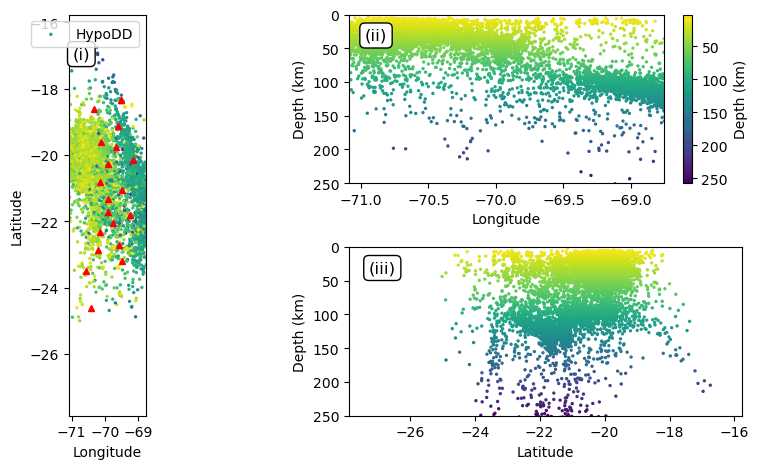

In [4]:
fig = plt.figure(figsize=plt.rcParams["figure.figsize"] * np.array([1.5, 1]))
box = dict(boxstyle='round', facecolor='white', alpha=1)
text_loc = [0.05, 0.92]
grd = fig.add_gridspec(ncols=2, nrows=2, width_ratios=[1.5, 1], height_ratios=[1, 1])
ax1 = fig.add_subplot(grd[:, 0])

if relocated is not None:
    scatter1 = ax1.scatter(relocated["longitude"], relocated["latitude"], c=relocated['depth_km'], cmap='viridis_r',
                           s=2, alpha=1)
plt.axis("scaled")
plt.xlim(np.array(config["xlim_degree"])+np.array([0.2,-0.27]))
plt.ylim(np.array(config["ylim_degree"])+np.array([0.2,-0.27]))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.gca().set_prop_cycle(None)
plt.scatter([], [], c='b', s=10, label=f"{result_label}", rasterized=True)
plt.scatter([], [], c='r', s=10, label=f"{catalog_label}", rasterized=True)
plt.plot(stations["longitude"], stations["latitude"], 'r^', markersize=5, alpha=1, label="Stations")
plt.legend(["HypoDD"])
#plt.legend(loc="lower right")
plt.text(text_loc[0], text_loc[1], '(i)', horizontalalignment='left', verticalalignment="top",
         transform=ax1.transAxes, fontsize="large", fontweight="normal", bbox=box)

ax2 = fig.add_subplot(grd[0, 1])

if relocated is not None:
    scatter2 = ax2.scatter(relocated["longitude"], relocated["depth_km"], c=relocated['depth_km'], cmap='viridis_r',
                           s=2, alpha=1, rasterized=True)
plt.xlim(np.array(config["xlim_degree"])+np.array([0.2,-0.27]))
plt.ylim(config["z(km)"])
plt.gca().invert_yaxis()
plt.xlabel("Longitude")
plt.ylabel("Depth (km)")
plt.gca().set_prop_cycle(None)
plt.scatter([], [], c='b', s=10, label=f"{result_label}")
plt.scatter([], [], c='r', s=10, label=f"{catalog_label}")

#plt.legend(loc="lower right")
plt.text(text_loc[0], text_loc[1], '(ii)', horizontalalignment='left', verticalalignment="top",
         transform=ax2.transAxes, fontsize="large", fontweight="normal", bbox=box)

ax3 = fig.add_subplot(grd[1, 1])

if relocated is not None:
    scatter3 = ax3.scatter(relocated["latitude"], relocated["depth_km"], c=relocated['depth_km'], cmap='viridis_r',
                           s=2, alpha=1, rasterized=True)

plt.xlim(np.array(config["ylim_degree"])+np.array([0.2,-0.27]))
plt.ylim(config["z(km)"])
plt.gca().invert_yaxis()
plt.xlabel("Latitude")
plt.ylabel("Depth (km)")
plt.gca().set_prop_cycle(None)
plt.scatter([], [], c='b', s=10, label=f"{result_label}")
plt.scatter([], [], c='r', s=10, label=f"{catalog_label}")
#plt.legend(loc="lower right")
plt.tight_layout()
plt.text(text_loc[0], text_loc[1], '(iii)', horizontalalignment='left', verticalalignment="top",
         transform=ax3.transAxes, fontsize="large", fontweight="normal", bbox=box)

cbar = plt.colorbar(scatter1, ax=ax2, label="Depth (km)")
cbar.ax.invert_yaxis()
plt.savefig('hypodd',dpi=500)
plt.show()

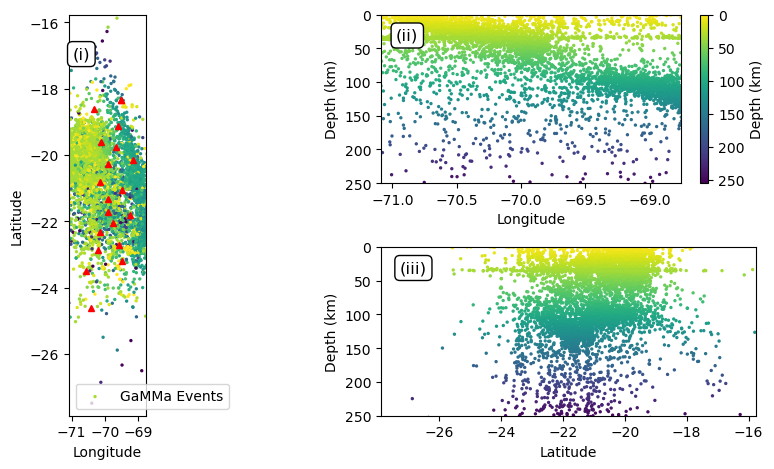

In [5]:
fig = plt.figure(figsize=plt.rcParams["figure.figsize"] * np.array([1.5, 1]))
box = dict(boxstyle='round', facecolor='white', alpha=1)
text_loc = [0.05, 0.92]
grd = fig.add_gridspec(ncols=2, nrows=2, width_ratios=[1.5, 1], height_ratios=[1, 1])
ax1 = fig.add_subplot(grd[:, 0])

if relocated is not None:
    scatter1 = ax1.scatter(gamma_events["longitude"], gamma_events["latitude"], c=gamma_events['depth_km'], cmap='viridis_r',
                           s=2, alpha=1)
plt.axis("scaled")
plt.xlim(np.array(config["xlim_degree"])+np.array([0.2,-0.27]))
plt.ylim(np.array(config["ylim_degree"])+np.array([0.2,-0.27]))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.gca().set_prop_cycle(None)
plt.scatter([], [], c='b', s=10, label=f"{result_label}", rasterized=True)
plt.scatter([], [], c='r', s=10, label=f"{catalog_label}", rasterized=True)
plt.legend(["GaMMa Events"])
plt.plot(stations["longitude"], stations["latitude"], 'r^', markersize=5, alpha=1, label="Stations")

#plt.legend(loc="lower right")
plt.text(text_loc[0], text_loc[1], '(i)', horizontalalignment='left', verticalalignment="top",
         transform=ax1.transAxes, fontsize="large", fontweight="normal", bbox=box)

ax2 = fig.add_subplot(grd[0, 1])

if relocated is not None:
    scatter2 = ax2.scatter(gamma_events["longitude"], gamma_events["depth_km"], c=gamma_events['depth_km'], cmap='viridis_r',
                           s=2, alpha=1, rasterized=True)
plt.xlim(np.array(config["xlim_degree"])+np.array([0.2,-0.27]))
plt.ylim(config["z(km)"])
plt.gca().invert_yaxis()
plt.xlabel("Longitude")
plt.ylabel("Depth (km)")
plt.gca().set_prop_cycle(None)
plt.scatter([], [], c='b', s=10, label=f"{result_label}")
plt.scatter([], [], c='r', s=10, label=f"{catalog_label}")

#plt.legend(loc="lower right")
plt.text(text_loc[0], text_loc[1], '(ii)', horizontalalignment='left', verticalalignment="top",
         transform=ax2.transAxes, fontsize="large", fontweight="normal", bbox=box)

ax3 = fig.add_subplot(grd[1, 1])

if relocated is not None:
    scatter3 = ax3.scatter(gamma_events["latitude"], gamma_events["depth_km"], c=gamma_events['depth_km'], cmap='viridis_r',
                           s=2, alpha=1, rasterized=True)
    
plt.xlim(np.array(config["ylim_degree"])+np.array([0.2,-0.27]))
plt.ylim(config["z(km)"])
plt.gca().invert_yaxis()
plt.xlabel("Latitude")
plt.ylabel("Depth (km)")
plt.gca().set_prop_cycle(None)
plt.scatter([], [], c='b', s=10, label=f"{result_label}")
plt.scatter([], [], c='r', s=10, label=f"{catalog_label}")
#plt.legend(loc="lower right")
plt.tight_layout()
plt.text(text_loc[0], text_loc[1], '(iii)', horizontalalignment='left', verticalalignment="top",
         transform=ax3.transAxes, fontsize="large", fontweight="normal", bbox=box)

cbar = plt.colorbar(scatter1, ax=ax2, label="Depth (km)")
cbar.ax.invert_yaxis()
plt.savefig('gamma',dpi=500)
plt.show()

# Plot Raypath

In [6]:
def plot_raypaths3d(events, stations):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plotting each station
    ax.scatter(stations['longitude'], stations['latitude'], stations['elevation_m'], color='red', marker='^', s=50, label='Stations')

    # Plotting each event and ray paths to all stations
    for i, event in events.iterrows():
        ax.scatter(event['longitude'], event['latitude'], -event['depth_km'], color='blue', marker='o', s=20)  # Event location

        for j, station in stations.iterrows():
            # Drawing a line (ray path) from each event to each station
            ax.plot([event['longitude'], station['longitude']], 
                    [event['latitude'], station['latitude']], 
                    [-event['depth_km'], station['elevation_m']], color='gray', linestyle='--', linewidth=1)

    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_zlabel('Depth/Elevation (km)')
    ax.set_title('Ray Paths from Seismic Events to Stations')
    plt.legend()
    plt.show()

def plot_raypaths2d(events, stations):
    plt.figure(figsize=(5, 10))

    # Plotting each station
    plt.scatter(stations['longitude'], stations['latitude'], color='red', marker='^', s=50, label='Stations')

    # Plotting each event and ray paths to all stations
    for i, event in events.iterrows():
        plt.scatter(event['longitude'], event['latitude'], color='blue', marker='o', s=20)  # Event location

        for j, station in stations.iterrows():
            # Drawing a line (ray path) from each event to each station
            plt.plot([event['longitude'], station['longitude']], 
                     [event['latitude'], station['latitude']], 
                     color='gray', linestyle=':', linewidth=0.5, alpha=0.2)

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('2D Ray Paths from Seismic Events to Stations')
    plt.legend()
    #plt.grid(True)
    plt.show()

In [ ]:
# Mengurangi jumlah data lebih lanjut untuk mengoptimalkan proses plotting
# Mengambil hanya 3 event dan 3 stasiun
reduced_events_df = gamma_events
reduced_stations_df = stations

# Mencoba plot raypaths lagi dengan jumlah data yang lebih terbatas
plot_raypaths2d(reduced_events_df, reduced_stations_df)
